<a href="https://colab.research.google.com/github/AruneshTamboli/Using-Python-to-automate-Google-Trends-Data/blob/main/How_to_use_Python_to_automate_Google_Trends_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Trends?**

Google Trends is a fantastic tool for capturing Google users' search trends. Using search trends could influence several pricing and marketing decisions, such as identifying need dates for promotions, potential high demand periods, evaluating potential lost business by comparing search trends to reservations made, and other revenue-related strategies, according to someone with a revenue management background in the hotel industry. Google Trends can be used to develop practical business strategies for any company.

I recently discovered pytrends and am still learning how to use the API, but I thought I'd share some of my findings. According to what I've learned, using Google Trends is simple, and automating and further analysing data with pytrends can truly optimise your strategies. Before diving into pytrends, it's best to visit Google Trends to get a sense of the data you're looking at. I searched for "hotels," then selected the state of interest (machine learning).

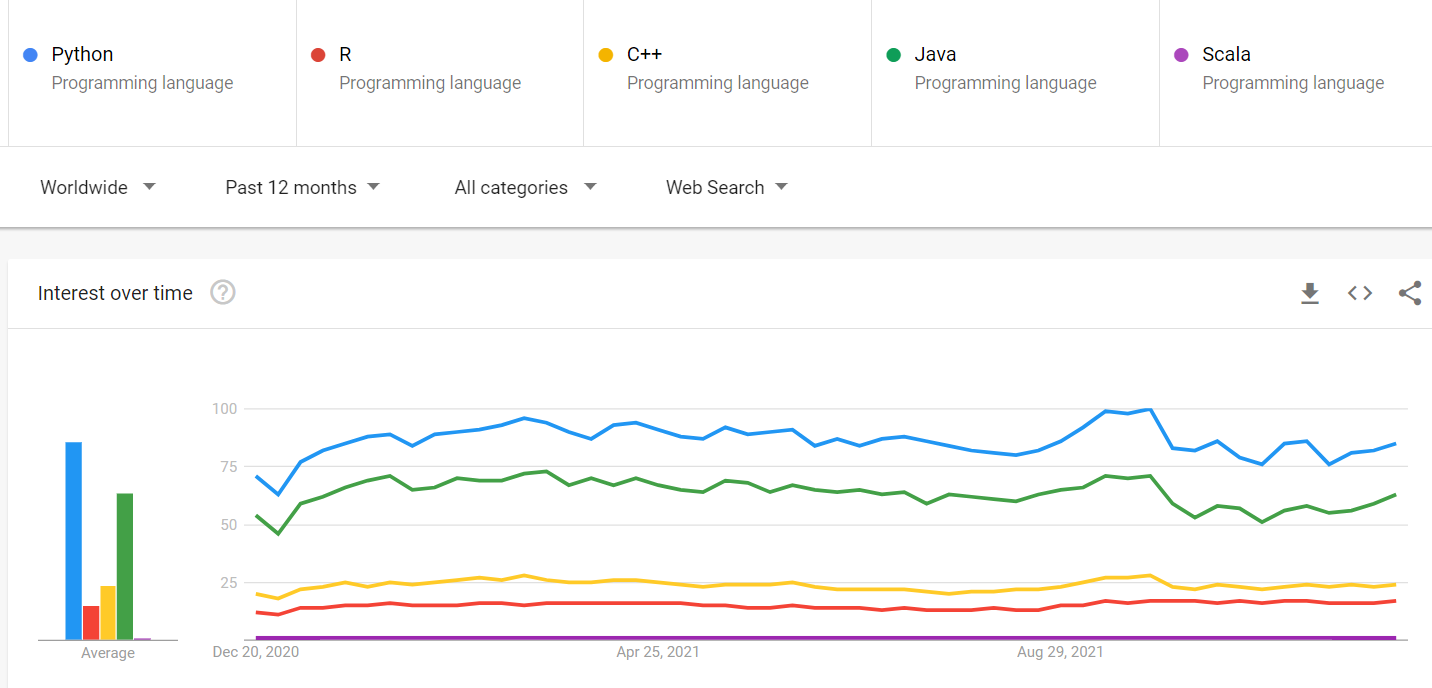

# How to use Python to automate Google Trends Data


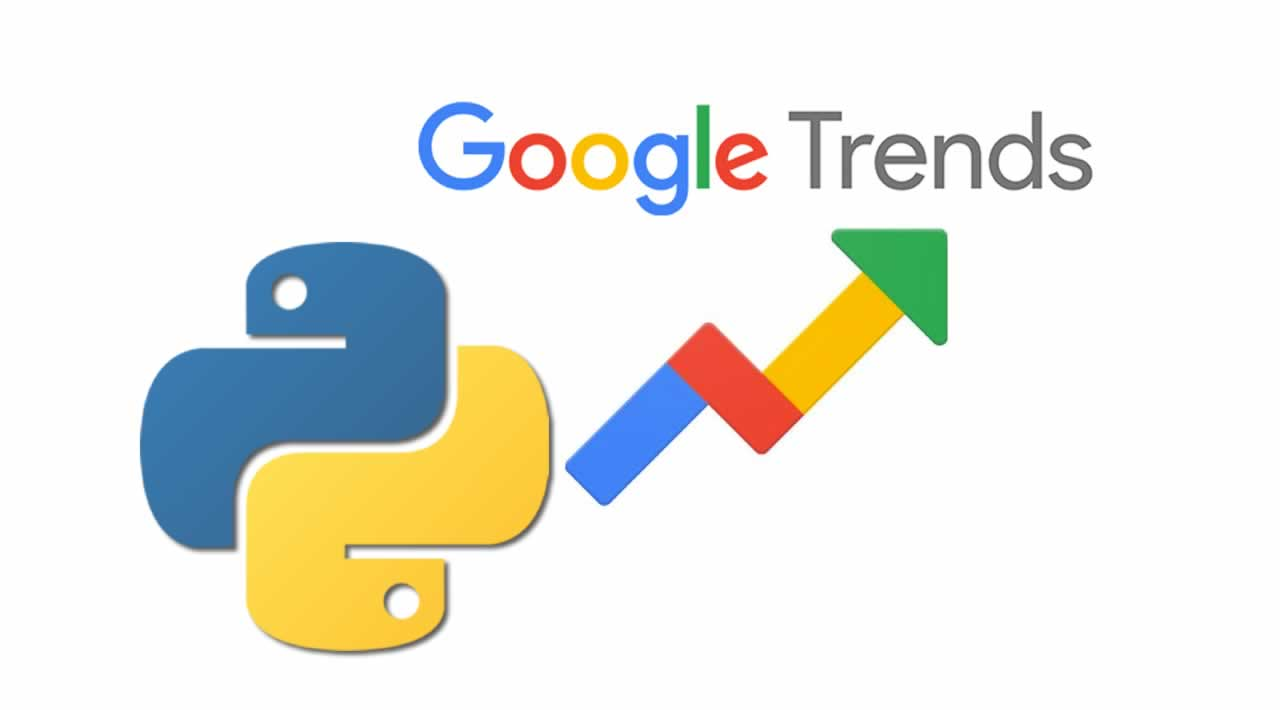

You can read the documents here: [Pytrends Documentation](https://pypi.org/project/pytrends/)

# **Table of contents:**

## What is pytrend?

## Installation

## Building payload

## Daily Search Trends

## Top Charts

## Google Keyword Suggestions

## Related Queries



## What is pytrend?

Pytrends is an unofficial Google Trends API that provides different methods to download reports of trending results from google trends. The Python package can be used for automation of different processes such as quickly fetching data that can be used for more analyses later on. 

# Installation

In order to install pytrends, you need to type the given code.

In [4]:
!pip install pytrends

## Importing libraries | Getting started

In [5]:
import pandas as pd
from pytrends.request import TrendReq

## Connect to Google

In [12]:
pytrend = TrendReq(hl='en-US', tz=360)

The TrendReq receives two important parameters.




hl stands for hosting language for accessing Google Trends; in this example, we set English.

tz stands for timezone, in this example, we use the US time zone (represented in minutes), which is 360.


# Building Payload


The build_payload method from Pytrends is used to build a list of keywords you want to search in Google Trends. You can also specify the timeframe to gather data and the category to query the data from.

In [13]:
pytrend.build_payload(kw_list=['machine learning'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10) 

,machine learning
geoName,
Afghanistan,0
Albania,0
Algeria,5
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


**Now you might be thinking what are the values, what do they denote?** 

The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. Source → [Google Trends](https://support.google.com/trends/answer/4355212)..

Let us plot the result on a bar graph because sometimes visual representation gives a clear picture.

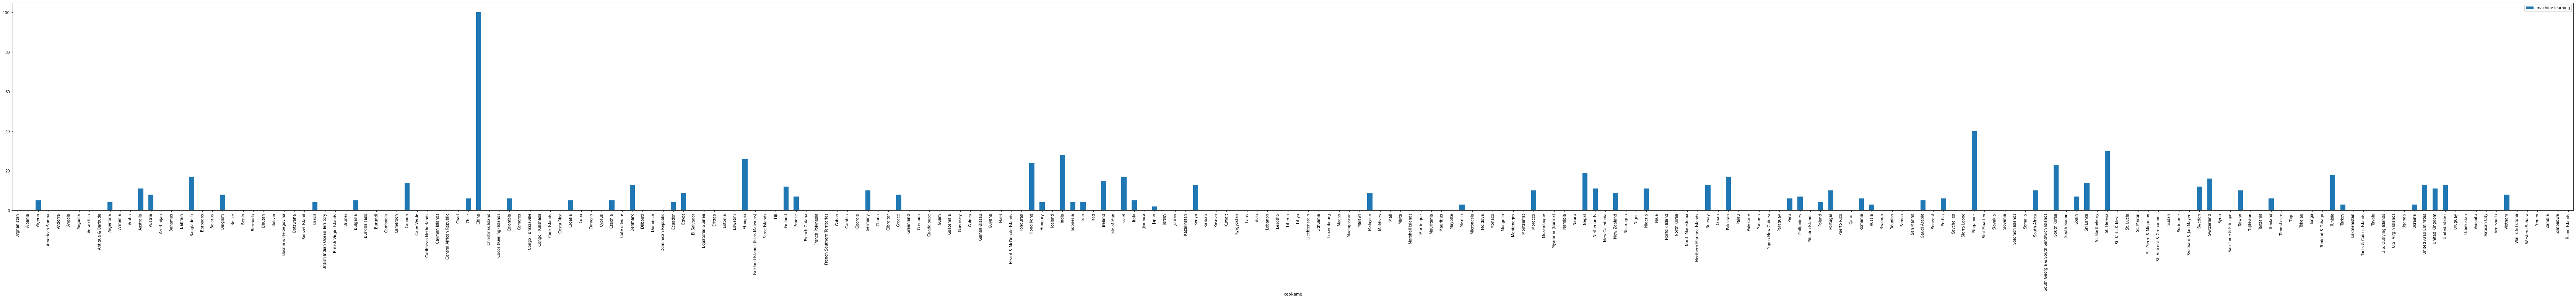

In [14]:
df.reset_index().plot(x='geoName', y='machine learning', figsize=(120, 10), kind ='bar')

Also, you use the parameter `resolution = 'COUNTRY_NAME'` to filter the results.



---



## Daily Search Trends

Now let us get the top daily search trends worldwide. To do this we have to use the `trending_searches()` method. If you want to search worldwide just don't pass any parameter.

In [16]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='india')
df.head()

,0
0,Stock Market
1,Real Madrid vs cádiz
2,Supriya lifescience ipo gmp
3,Supriya Lifescience IPO
4,Shriram Properties share price


Make sure you enter the country name in lowercase `pn = "canada"` . Also, you can compare the above results with the [google trend's result](https://trends.google.com/trends/trendingsearches/daily?geo=US). To get today's trending topics just use:

In [25]:
df = pytrend.today_searches(pn='IN')
df

0                       Stock Market
1               Real Madrid vs cádiz
2        Supriya lifescience ipo gmp
3            Supriya Lifescience IPO
4     Shriram Properties share price
5                      Panama Papers
6                        Arslan Goni
7                      Hamsa Nandini
8             Covid-19 Omicron cases
9         Medplus IPO allotment date
10                           Govinda
11                   Milan vs Napoli
12                    Faria Abdullah
13                     Lockdown news
14                            Mbappe
15           Jamshedpur vs Bengaluru
16                         GATE 2022
17                   Erica Fernandes
18                 Bajrangi Bhaijaan
19                     Jaya Bachchan
Name: query, dtype: object

## Top Charts

Let us see what was trending in 2021. With the help of `top_charts` method we can get the top trending searches yearly.

In [29]:
# Get Google Top Charts
df = pytrend.top_charts(2021, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,


To compare the results just visit [Google Trends](https://trends.google.com/trends/yis/2021/GLOBAL/). We can specify the year and the country that we want to see the trending searches.



---



## Google Keyword Suggestions

Let us see how can we obtain google's keyword suggestion. If you don't know what I'm talking about. The below image explains things more clear.

![alt text](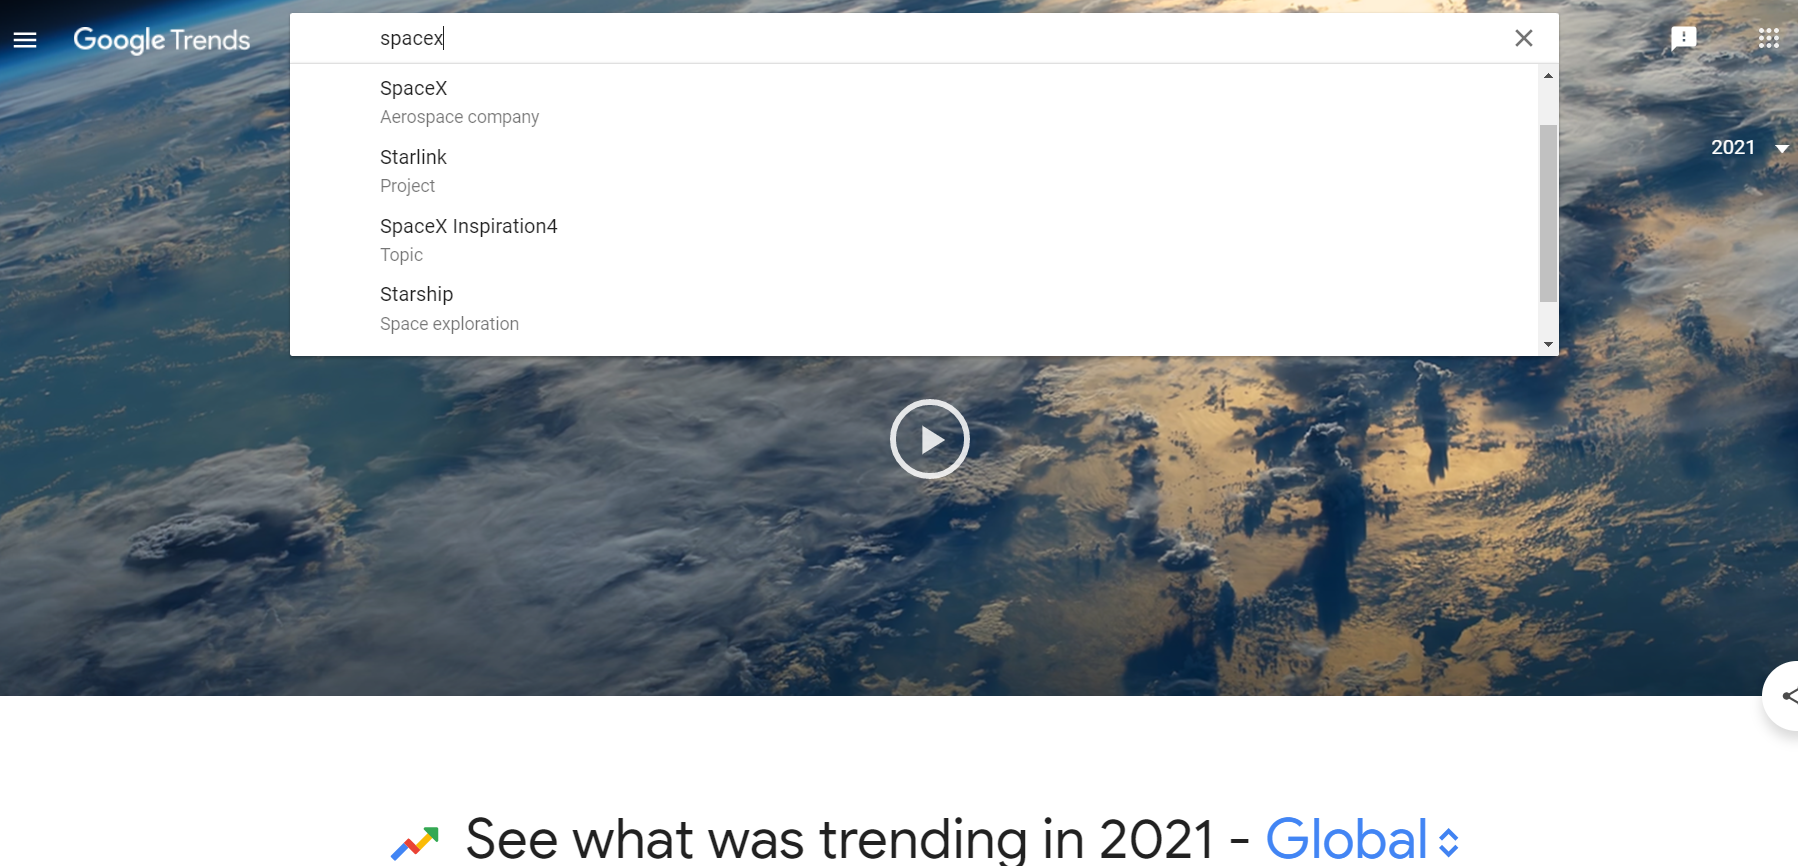)

In [28]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='spacex')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,SpaceX,Aerospace company
1,Starlink,Project
2,SpaceX Inspiration4,Topic
3,Starship,Space exploration
4,SpaceX Dragon,Topic


## Related Queries

It's a common thing that when a user searches for a topic, they would also search for something related. These are called related queries. Let us see what are the related queries for the topic "**jobs**" Always remember when you want to change the topic name just run the following code again with the new name as the parameter.

In [62]:
pytrend.build_payload(kw_list=['data science jobs'])

Now let's run the method `related_queries` which returns a dictionary full of related queries for the topic **data science**

In [63]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                              query  value
0             jobs in data science    100
1                   data scientist     35
2              data scientist jobs     35
3         data science jobs salary     32
4              data science salary     31
5                     data analyst     24
6                data analyst jobs     23
7            computer science jobs     22
8                 computer science     21
9                  data entry jobs     16
10      data science jobs in india     15
11                  data analytics     15
12             data science course     13
13            what is data science     13
14                   data engineer     12
15           data scientist salary     11
16                     google jobs     10
17   data science jobs entry level     10
18        remote data science jobs     10
19     data science jobs bangalore     10
20             data science degree     10
21  data science jobs in bangalore      9
22  data scie

Similarly, you can also search for the related topics just run the below code to do so:

In [64]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':      value  ...                topic_type
0   208000  ...            Field of study
1   155250  ...                   Website
2   126250  ...                     Topic
3    77950  ...                     Topic
4    69850  ...            Field of study
5    57900  ...                     Topic
6    57800  ...                     Topic
7    54500  ...    Country in East Africa
8    54100  ...                     Topic
9    48300  ...                     Topic
10   47400  ...                     Topic
11   47050  ...                     Topic
12   46600  ...                     Topic
13   44150  ...          City in Colorado
14   43800  ...                Discipline
15   43400  ...           School category
16   43300  ...                     Topic
17     900  ...                     Topic
18     350  ...             City in India
19     300  ...  Country in North America
20     300  ...                     Topic
21     300  ...                    Degree
22     250

This is the end of the tutorial, I hope you guys have learned a thing or two. If you guys have any doubts regarding the tutorial let me know via the comment section. Although this is a short tutorial there is a lot to learn. Alright see you in my next tutorial, have a good day!!!